In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [37]:
# Files opening
path = "./data/"
trainingSetValues = pd.read_csv(path + "TrainingSetValues.csv", sep=",")
trainingSetLabels = pd.read_csv(path + "TrainingSetLabels.csv", sep=",")
testSetValues = pd.read_csv(path + "TestSetValues.csv", sep=",")

# Constants
PRINT = FALSE


In [38]:
#testSetValues.head()
print(testSetValues.columns)
print(len(testSetValues.columns))

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')
40


In [39]:
trainingSetLabels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [40]:
# Converting columns in the good dtype
def changeDtypes(data):
    for column in data:
        if "date" in column:
                data[column] = pd.to_datetime(data[column], format="%Y/%m/%d")
        else:
            if data[column].dtype == "object":
                data[column] = pd.Categorical(data[column])

changeDtypes(trainingSetValues)
changeDtypes(testSetValues)


In [41]:
# List number of NaN values in data
def get_nan_count(column):
    '''
    column - the column for which we want the NaN value count.
    This function returns the number of NaN values in a specific column.
    '''
    nan_count = column.isnull().sum()
    return nan_count

def list_nb_nan_columns(data):
    for column in data:
        nb = get_nan_count(data[column])
        if nb != 0:
            totalCol = data[column].count() + nb
            print(column,":", round(nb/totalCol *100 ,3), "%")
        
        
print("\nNaN data in trainingSetValues")
list_nb_nan_columns(trainingSetValues)
print("\nNaN data in testSetValues")
list_nb_nan_columns(testSetValues)


NaN data in trainingSetValues
funder : 6.12 %
installer : 6.153 %
subvillage : 0.625 %
public_meeting : 5.613 %
scheme_management : 6.527 %
scheme_name : 47.418 %
permit : 5.145 %

NaN data in testSetValues
funder : 5.852 %
installer : 5.906 %
subvillage : 0.667 %
public_meeting : 5.529 %
scheme_management : 6.525 %
scheme_name : 47.758 %
permit : 4.963 %


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


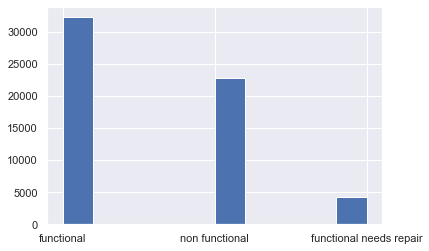

In [42]:
# Functional state
print(trainingSetLabels['status_group'].value_counts())
trainingSetLabels['status_group'].hist()
plt.show()

In [43]:
# amount_tsh
print(trainingSetValues['amount_tsh'].value_counts())
print(testSetValues['amount_tsh'].value_counts())
# Delete amount_tsh from both data sets because of too many '0' values
trainingSetValues.drop(['amount_tsh'], axis = 1, inplace = True)
testSetValues.drop(['amount_tsh'], axis = 1, inplace = True)

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64
0.0         10410
500.0         772
50.0          631
1000.0        370
20.0          349
            ...  
14000.0         1
0.2             1
70000.0         1
100000.0        1
2800.0          1
Name: amount_tsh, Length: 68, dtype: int64


In [44]:
# date_recorded
print(trainingSetValues['date_recorded'].dt.year.value_counts())
print(testSetValues['date_recorded'].dt.year.value_counts())
# Deleting
del trainingSetValues['date_recorded']
del testSetValues['date_recorded']

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64
2011    7234
2013    5939
2012    1665
2004      11
2001       1
Name: date_recorded, dtype: int64


In [45]:
# funder
# Replace missing values with the most frequent funder
trainingSetValues['funder'] = trainingSetValues['funder'].fillna(trainingSetValues['funder'].value_counts().index[0])
testSetValues['funder'] = testSetValues['funder'].fillna(testSetValues['funder'].value_counts().index[0])
print(trainingSetValues['funder'].value_counts())
print(testSetValues['funder'].value_counts())

Government Of Tanzania    12719
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
                          ...  
Malola                        1
Maliasili                     1
Males                         1
Makusa                        1
Zingibali Secondary           1
Name: funder, Length: 1897, dtype: int64
Government Of Tanzania    3084
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
                          ... 
Matyenye                     1
Maxavella                    1
Mboma                        1
Mbozi District Council       1
Zara Camp                    1
Name: funder, Length: 980, dtype: int64


In [46]:
# gps_height
print(trainingSetValues['gps_height'].max())
print(trainingSetValues['gps_height'].min())
print(trainingSetValues['gps_height'].mean())
print(trainingSetValues['gps_height'].value_counts())

# Replacing all 0 values by the mean
#trainingSetValues['gps_height'].replace(0, trainingSetValues['gps_height'].mean(), inplace=True)
#testSetValues['gps_height'].replace(0, testSetValues['gps_height'].mean(), inplace=True)

# Do not work yet : Replacing 0 values in gps_height with average of others which are in the same district
#for i in range(trainingSetValues.shape[0]):
#    if trainingSetValues['gps_height'].iloc[i] == 0:
#        district_i = trainingSetValues['district_code'].iloc[i]
#        sum = 0
#        nb = 0
#        for j in range(trainingSetValues.shape[0]):
 #           if i != j and district_i == trainingSetValues['district_code'].iloc[j]:
 #               sum += trainingSetValues['gps_height'].iloc[j]
 #               nb += 1
 #       trainingSetValues['gps_height'].iloc[i] = sum / nb

2770
-90
668.297239057239
 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64


In [47]:
# installer
trainingSetValues['installer'].value_counts()
# Replace missing values with the most frequent installer
trainingSetValues['installer'] = trainingSetValues['installer'].fillna(trainingSetValues['installer'].value_counts().index[0])
testSetValues['installer'] = testSetValues['installer'].fillna(testSetValues['installer'].value_counts().index[0])
print(trainingSetValues['installer'].value_counts())
print(testSetValues['installer'].value_counts())

DWE                 21057
Government           1825
RWE                  1206
Commu                1060
DANIDA               1050
                    ...  
MH Kapuya               1
METHODIST CHURCH        1
MECO                    1
MBUZI MAWE              1
world vision            1
Name: installer, Length: 2145, dtype: int64
DWE                              5226
Government                        457
RWE                               292
Commu                             287
DANIDA                            255
                                 ... 
Africa Muslum Agence Tanzania       1
MWS                                 1
Machibya                            1
Magati                              1
world                               1
Name: installer, Length: 1091, dtype: int64


In [48]:
# longitude and latitude
print(trainingSetValues['latitude'].value_counts())
print(trainingSetValues['longitude'].value_counts())

-2.000000e-08    1812
-6.985842e+00       2
-6.980220e+00       2
-2.476680e+00       2
-6.978263e+00       2
                 ... 
-3.287619e+00       1
-8.234989e+00       1
-3.268579e+00       1
-1.146053e+01       1
-6.747464e+00       1
Name: latitude, Length: 57517, dtype: int64
0.000000     1812
37.375717       2
38.340501       2
39.086183       2
33.005032       2
             ... 
35.885754       1
36.626541       1
37.333530       1
38.970078       1
38.104048       1
Name: longitude, Length: 57516, dtype: int64


In [49]:
# wpt_name deletion
del trainingSetValues["wpt_name"]
del testSetValues["wpt_name"]

In [50]:
# num_private deletion 
del trainingSetValues['num_private']
del testSetValues['num_private']

In [51]:
# Deletion of basin, subvillage, region, lga and ward
del trainingSetValues['basin']
del testSetValues['basin']
del trainingSetValues['subvillage']
del testSetValues['subvillage']
del trainingSetValues['region']
del testSetValues['region']
del trainingSetValues['lga']
del testSetValues['lga']
del trainingSetValues['ward']
del testSetValues['ward']

In [52]:
# For geographic location we just keep region_code and district_code
# region_code
print(trainingSetValues['region_code'].value_counts())   
# district_code
print(trainingSetValues['district_code'].value_counts())  


11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64
1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64


0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64
0       5453
1       1757
150      436
200      430
250      406
        ... 
745        1
4735       1
447        1
546        1
2960       1
Name: population, Length: 637, dtype: int64


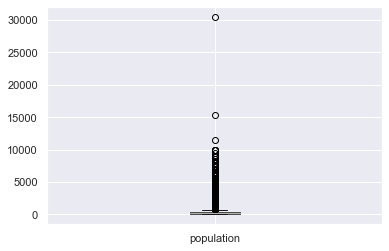

count     9397.000000
mean       290.954134
std        563.265359
min          1.000000
25%         40.000000
50%        150.000000
75%        350.000000
max      11469.000000
Name: population, dtype: float64


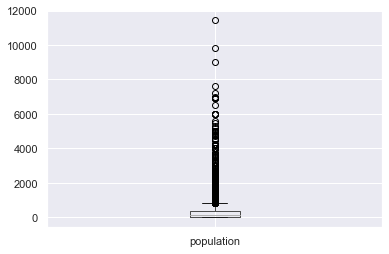

In [53]:
# population

print(trainingSetValues['population'].value_counts())
print(testSetValues['population'].value_counts())
# boxplot excluding 0
trainingSetValues[trainingSetValues['population'] != 0].boxplot(column=['population'])
plt.show()
print(testSetValues['population'][testSetValues['population'] != 0].describe())
testSetValues[testSetValues['population'] != 0].boxplot(column=['population'])
plt.show()

# Replacing 0 by the median
median = trainingSetValues['population'][trainingSetValues['population'] != 0].median
trainingSetValues['population'] = trainingSetValues['population'].replace(0, median)
median = testSetValues['population'][testSetValues['population'] != 0].median
testSetValues['population'] = testSetValues['population'].replace(0, median)


In [54]:
# public meeting
print(trainingSetValues['public_meeting'].value_counts())
print(testSetValues['public_meeting'].value_counts())
# replacing missing values by True
trainingSetValues['public_meeting'] = trainingSetValues['public_meeting'].fillna(trainingSetValues['public_meeting'].value_counts().index[0])
testSetValues['public_meeting'] = testSetValues['public_meeting'].fillna(testSetValues['public_meeting'].value_counts().index[0])

True     51011
False     5055
Name: public_meeting, dtype: int64
True     12738
False     1291
Name: public_meeting, dtype: int64


In [55]:
# recorded_by deletion 
del trainingSetValues['recorded_by']
del testSetValues['recorded_by']

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64
VWC                 9124
WUG                 1290
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64


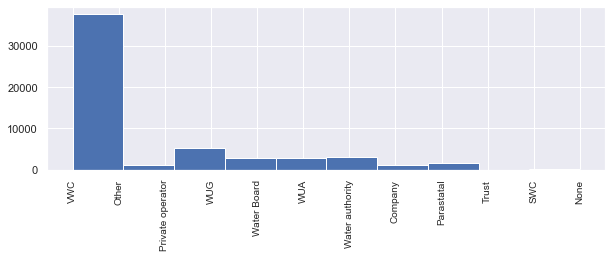

VWC                 40670
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64
VWC                 10093
WUG                  1290
Water authority       822
Water Board           714
WUA                   668
Parastatal            444
Company               280
Private operator      263
Other                 230
SWC                    26
Trust                  20
Name: scheme_management, dtype: int64


In [56]:
# scheme_management and scheme_name
print(trainingSetValues['scheme_management'].value_counts())
print(testSetValues['scheme_management'].value_counts())
trainingSetValues['scheme_management'].hist(xlabelsize=10, xrot=90, figsize=(10,3))
plt.show()
# replacing missing values by the most represented one
trainingSetValues['scheme_management'] = trainingSetValues['scheme_management'].fillna(trainingSetValues['scheme_management'].value_counts().index[0])
testSetValues['scheme_management'] = testSetValues['scheme_management'].fillna(testSetValues['scheme_management'].value_counts().index[0])
print(trainingSetValues['scheme_management'].value_counts())
print(testSetValues['scheme_management'].value_counts())

# scheme_name deletion 
del trainingSetValues['scheme_name']
del testSetValues['scheme_name']


In [57]:
# permit
print(trainingSetValues['permit'].value_counts())
print(testSetValues['permit'].value_counts())
# replacing missing values by True
trainingSetValues['permit'] = trainingSetValues['permit'].fillna(trainingSetValues['permit'].value_counts().index[0])
testSetValues['permit'] = testSetValues['permit'].fillna(testSetValues['permit'].value_counts().index[0])

True     38852
False    17492
Name: permit, dtype: int64
True     9754
False    4359
Name: permit, dtype: int64


In [58]:
# construction_year
print(trainingSetValues['construction_year'].value_counts())

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64


gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: ext

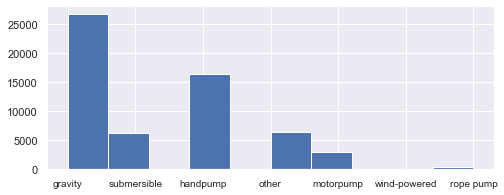

In [59]:
# extraction_type
print(trainingSetValues['extraction_type'].value_counts())
print(trainingSetValues['extraction_type_group'].value_counts())
print(trainingSetValues['extraction_type_class'].value_counts())
trainingSetValues['extraction_type_class'].hist(xlabelsize=10, figsize=(8,3))
plt.show()
# recorded_by deletion 
del trainingSetValues['extraction_type']
del testSetValues['extraction_type']
del trainingSetValues['extraction_type_group']
del testSetValues['extraction_type_group']


vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


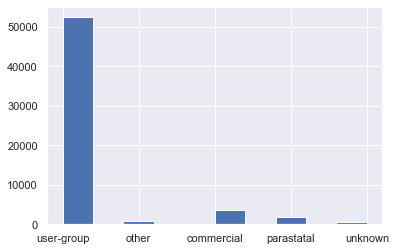

In [60]:
# management
print(trainingSetValues['management'].value_counts())
print(trainingSetValues['management_group'].value_counts())

trainingSetValues['management_group'].hist()
plt.show()

# management deletion 
del trainingSetValues['management']
del testSetValues['management']


never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


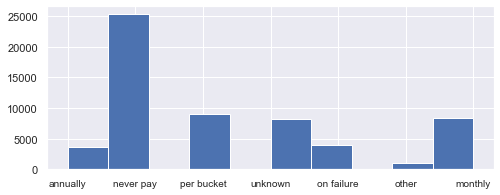

In [61]:
# payment
print(trainingSetValues['payment'].value_counts())
print(trainingSetValues['payment_type'].value_counts())

trainingSetValues['payment_type'].hist(xlabelsize=10, figsize=(8,3))
plt.show()

# payment deletion 
del trainingSetValues['payment']
del testSetValues['payment']


soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


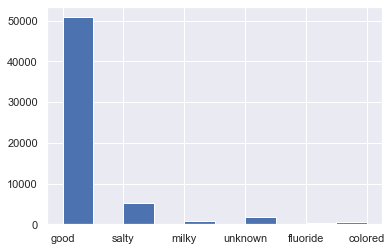

In [62]:
# quality 
print(trainingSetValues['water_quality'].value_counts())
print(trainingSetValues['quality_group'].value_counts())

trainingSetValues['quality_group'].hist()
plt.show()

# water_quality deletion 
del trainingSetValues['water_quality']
del testSetValues['water_quality']

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


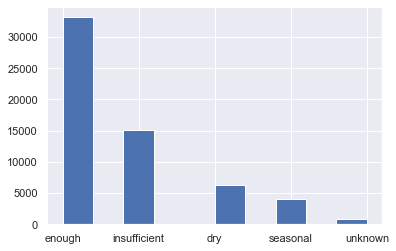

In [63]:
# quantity 
print(trainingSetValues['quantity'].value_counts())
print(trainingSetValues['quantity_group'].value_counts())

trainingSetValues['quantity'].hist()
plt.show()

# quantity_group deletion 
del trainingSetValues['quantity_group']
del testSetValues['quantity_group']

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


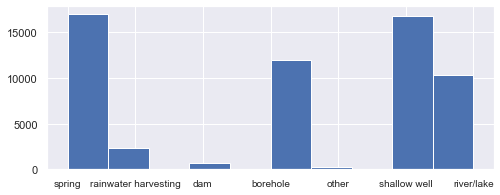

In [64]:
# source
print(trainingSetValues['source'].value_counts())
print(trainingSetValues['source_type'].value_counts())
print(trainingSetValues['source_class'].value_counts())

trainingSetValues['source_type'].hist(xlabelsize=10, figsize=(8,3))
plt.show()

# source and source_class deletion 
del trainingSetValues['source']
del testSetValues['source']
del trainingSetValues['source_class']
del testSetValues['source_class']

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


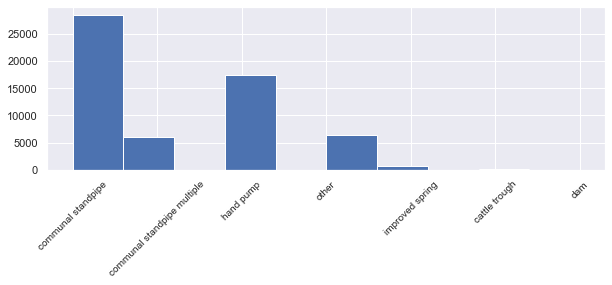

In [65]:
# waterpoint
print(trainingSetValues['waterpoint_type'].value_counts())
print(trainingSetValues['waterpoint_type_group'].value_counts())

trainingSetValues['waterpoint_type'].hist(xlabelsize=10, xrot=45, figsize=(10,3))
plt.show()

# waterpoint_type_group deletion 
del trainingSetValues['waterpoint_type_group']
del testSetValues['waterpoint_type_group']


In [66]:
# Summary of data preparation
print(trainingSetValues.columns)
print(testSetValues.columns)
print("\nNaN data in trainingSetValues")
list_nb_nan_columns(trainingSetValues)
print("\nNaN data in testSetValues")
list_nb_nan_columns(testSetValues)


Index(['id', 'funder', 'gps_height', 'installer', 'longitude', 'latitude',
       'region_code', 'district_code', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'waterpoint_type'],
      dtype='object')
Index(['id', 'funder', 'gps_height', 'installer', 'longitude', 'latitude',
       'region_code', 'district_code', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'waterpoint_type'],
      dtype='object')

NaN data in trainingSetValues

NaN data in testSetValues
